In [15]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

#the above imports the plotting library matplotlib

# Loading Images as Python Arrays (Tensors)

In [16]:
#let's see where we are -- ok in the directory where I've downloaded the Psych 253 repo
pwd

u'/home/yamins/psych253/2020'

In [17]:
#let's look at what we have here
ls

 cross_validation.py     Lecture2_reliability.ipynb       NHANES_data.csv
 data/                   Lecture3_modeling.ipynb          optimizer.py
 decomposition.py        Lecture8_OLSregression.ipynb     test_cv.py
 get_balanced_folds.py   metrics.py                      'two bears.jpg'
 Lecture1_intro.ipynb    minimum_distance_classifier.py   utils.py


In [18]:
#we'll use the Python Image Library to load and manipulate images such as jpgs
from PIL import Image

In [19]:
#let's load the image "two bears.jpg"
bear_image = Image.open('two bears.jpg')

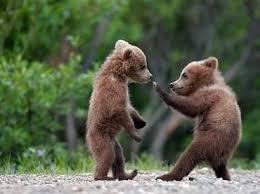

In [20]:
bear_image

In [21]:
#numpy is the numerical python library.  It's the main "tensor" or "array" library in python
import numpy as np

In [22]:
#here we can convert the image to an array (aka a "tensor")
bear_array = np.asarray(bear_image)

In [23]:
#what's the dimension of this tensor?
bear_array.ndim

3

In [24]:
#what's the shape of the tensor?
bear_array.shape
#the first two numbers of the shape are the pixel size of the image
#the last number is the fact that there are 3 color channels

(194, 260, 3)

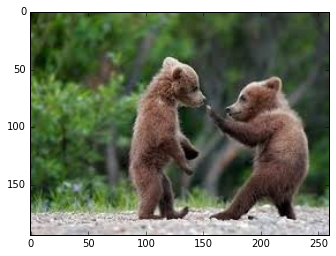

In [25]:
#let's view the array using the matplotlib "imshow" routine
plt.imshow(bear_array)

In [26]:
#but it's really a numerical array under the hood
bear_array

array([[[ 30,  47,  13],
        [ 30,  47,  11],
        [ 35,  53,  15],
        ...,
        [ 68,  80,  66],
        [ 71,  83,  69],
        [ 74,  86,  72]],

       [[ 30,  47,  13],
        [ 27,  44,   8],
        [ 30,  48,  10],
        ...,
        [ 65,  77,  63],
        [ 69,  81,  67],
        [ 72,  84,  70]],

       [[ 30,  47,  13],
        [ 23,  40,   4],
        [ 24,  42,   4],
        ...,
        [ 62,  75,  58],
        [ 65,  78,  61],
        [ 68,  81,  64]],

       ...,

       [[192, 183, 184],
        [194, 185, 186],
        [198, 189, 190],
        ...,
        [188, 187, 193],
        [193, 192, 198],
        [193, 192, 198]],

       [[183, 177, 177],
        [174, 168, 168],
        [176, 170, 170],
        ...,
        [184, 183, 189],
        [198, 197, 203],
        [207, 206, 212]],

       [[177, 171, 171],
        [168, 162, 162],
        [170, 164, 164],
        ...,
        [184, 183, 189],
        [198, 197, 203],
        [207, 206, 212]]

In [27]:
#here's how we index into array to get one element (item in position 22,45)
bear_array[22, 45]

array([51, 93, 43], dtype=uint8)

In [28]:
#here's a 2x2 square of pixels in the upper left corner
bear_array[:2, :2]

array([[[30, 47, 13],
        [30, 47, 11]],

       [[30, 47, 13],
        [27, 44,  8]]], dtype=uint8)

# Dataset 1: Self Regulation Ontology Datset

In [29]:
"""
ran 

   git clone https://github.com/IanEisenberg/Self_Regulation_Ontology
   
in the /mnt/data3/yamins directory
""";

In [31]:
#let's have a look at what's in the repo
ls /mnt/data3/yamins/Self_Regulation_Ontology/  

annotations/            Makefile
batch_files/            misc_scripts/
cross_decomposition/    ontology_mapping/
Data/                   pilot_expanalysis_scripts/
data_preparation/       prediction_analyses/
demographic_analyses/   README.md
dimensional_structure/  references/
discovery_analyses/     replication/
docker2singularity.sh   requirements1.txt
Dockerfile              requirements2.txt
docs/                   Results/
environment.yml         retest_analyses/
experiment_notes.txt    selfregulation/
graph_analysis/         Self_Regulation_Settings_example.txt
individual_structure/   setup.py
item_selection/         survey_items_analyses/


In [32]:
#here is the complete data from the first collection
ls /mnt/data3/yamins/Self_Regulation_Ontology/Data/Complete_02-16-2019/

alcohol_drugs.csv
alcohol_drugs_ordinal.csv
demographic_health.csv
demographics.csv
demographics_ordinal.csv
DV_valence.csv
health.csv
health_ordinal.csv
Individual_Measures/
items.csv.gz
meaningful_variables_clean.csv
meaningful_variables.csv
meaningful_variables_EZ.csv
meaningful_variables_hddm.csv
meaningful_variables_imputed.csv
meaningful_variables_imputed_for_task_selection.csv
meaningful_variables_noDDM.csv
metadata/
README.txt
references/
short_DV_valence.csv
short_meaningful_variables_clean.csv
short_meaningful_variables.csv
short_meaningful_variables_EZ.csv
short_meaningful_variables_hddm.csv
short_meaningful_variables_imputed.csv
short_meaningful_variables_imputed_for_task_selection.csv
short_meaningful_variables_noDDM.csv
short_subject_x_items.csv
short_taskdata_clean.csv
short_taskdata.csv
short_taskdata_imputed.csv
short_taskdata_imputed_for_task_selection.csv
short_variables_exhaustive.csv
subject_x_items.csv
taskdata_clean.csv
taskdata.csv
taskdata_imputed.csv
taskdata_

In [33]:
#let's look at what's in the README
cat /mnt/data3/yamins/Self_Regulation_Ontology/Data/Complete_02-16-2019/README.txt

demographics_survey.csv: demographic information from expfactory-surveys

alcohol_drug_survey.csv: alcohol, smoking, marijuana and other drugs from expfactory-surveys

ky_survey.csv: mental health and neurological/health conditions from expfactory-surveys

items.csv.gz: gzipped csv of all item information across surveys

subject_x_items.csv: reshaped items.csv such that rows are subjects and columns are individual items

Individual Measures: directory containing gzip compressed files for each individual measures

DV_valence.csv: Subjective assessment of whether each variable's 'natural' direction implies 'better' self regulation

variables_exhaustive.csv: all variables calculated for each measure

meaningful_variables_noDDM.csv: subset of exhaustive data to only meaningful variables with DDM parameters removed

meaningful_variables_EZ.csv: subset of exhaustive data to only meaningful variables with rt/acc parameters removed (replaced by EZ DDM params)

meaningful_variables_hddm.csv: su

In [34]:
sro_datadir = "/mnt/data3/yamins/Self_Regulation_Ontology/Data/Complete_02-16-2019"

In [35]:
#this is using the "os" library to look at files rather than jupyter magic command "ls"
import os
os.listdir(sro_datadir)

['short_meaningful_variables_imputed_for_task_selection.csv',
 'subject_x_items.csv',
 'README.txt',
 'meaningful_variables_noDDM.csv',
 'demographic_health.csv',
 'short_meaningful_variables.csv',
 'short_subject_x_items.csv',
 'short_meaningful_variables_noDDM.csv',
 'short_taskdata_imputed.csv',
 'short_meaningful_variables_hddm.csv',
 'meaningful_variables_imputed_for_task_selection.csv',
 'short_DV_valence.csv',
 'short_meaningful_variables_clean.csv',
 'meaningful_variables_imputed.csv',
 'taskdata_clean.csv',
 'short_taskdata.csv',
 'meaningful_variables_clean.csv',
 'meaningful_variables.csv',
 'taskdata_imputed_for_task_selection.csv',
 'meaningful_variables_EZ.csv',
 'health_ordinal.csv',
 'items.csv.gz',
 'short_variables_exhaustive.csv',
 'short_taskdata_clean.csv',
 'demographics_ordinal.csv',
 'alcohol_drugs.csv',
 'references',
 'DV_valence.csv',
 'meaningful_variables_hddm.csv',
 'health.csv',
 'demographics.csv',
 'short_meaningful_variables_imputed.csv',
 'taskdata.cs

In [241]:
#illustrating the use of the os.path.join function to build file paths
individual_datadir = os.path.join(sro_datadir, 'Individual_Measures')
os.listdir(individual_datadir)

['mindful_attention_awareness_survey.csv.gz',
 'columbia_card_task_hot.csv.gz',
 'dot_pattern_expectancy.csv.gz',
 'stroop.csv.gz',
 'five_facet_mindfulness_survey.csv.gz',
 'self_regulation_survey.csv.gz',
 'future_time_perspective_survey.csv.gz',
 'digit_span.csv.gz',
 'stop_signal.csv.gz',
 'shape_matching.csv.gz',
 'probabilistic_selection.csv.gz',
 'selection_optimization_compensation_survey.csv.gz',
 'grit_scale_survey.csv.gz',
 'motor_selective_stop_signal.csv.gz',
 'go_nogo.csv.gz',
 'erq_survey.csv.gz',
 'alcohol_drugs_survey.csv.gz',
 'adaptive_n_back.csv.gz',
 'ten_item_personality_survey.csv.gz',
 'simon.csv.gz',
 'angling_risk_task_always_sunny.csv.gz',
 'directed_forgetting.csv.gz',
 'dospert_rt_survey.csv.gz',
 'simple_reaction_time.csv.gz',
 'stim_selective_stop_signal.csv.gz',
 'theories_of_willpower_survey.csv.gz',
 'bis_bas_survey.csv.gz',
 'information_sampling_task.csv.gz',
 'k6_survey.csv.gz',
 'mpq_control_survey.csv.gz',
 'two_stage_decision.csv.gz',
 'sensation

In [242]:
#Let's have a look at data for one of the tasks, the "three-by-two" task

import pandas as pd
df  = pd.read_csv(os.path.join(individual_datadir, 'threebytwo.csv.gz'),
                  index_col=0)
df

CTI             battery_name  correct  \
threebytwo_s000_0006  100.0  Self Regulation Battery     True   
threebytwo_s000_0011  900.0  Self Regulation Battery     True   
threebytwo_s000_0016  900.0  Self Regulation Battery    False   
threebytwo_s000_0021  900.0  Self Regulation Battery    False   
threebytwo_s000_0026  900.0  Self Regulation Battery    False   
threebytwo_s000_0031  100.0  Self Regulation Battery     True   
threebytwo_s000_0036  100.0  Self Regulation Battery    False   
threebytwo_s000_0041  900.0  Self Regulation Battery     True   
threebytwo_s000_0046  100.0  Self Regulation Battery     True   
threebytwo_s000_0051  100.0  Self Regulation Battery     True   
threebytwo_s000_0056  900.0  Self Regulation Battery     True   
threebytwo_s000_0061  900.0  Self Regulation Battery     True   
threebytwo_s000_0066  100.0  Self Regulation Battery    False   
threebytwo_s000_0071  100.0  Self Regulation Battery    False   
threebytwo_s000_0076  100.0  Self Regulation Battery     True   
threebytwo_s000_0081  100.0  Self Regulation Battery     True   
threebytwo_s000_0086  100.0  Self Regulation Battery    False   
threebytwo_s000_0091  900.0  Self Regulation Battery    False   
threebytwo_s000_0096  100.0  Self Regulation Battery     True   
threebytwo_s000_0101  900.0  Self Regulation Battery     True   
threebytwo_s000_0106  900.0  Self Regulation Battery     True   
threebytwo_s000_0111  900.0  Self Regulation Battery     True   
threebytwo_s000_0116  900.0  Self Regulation Battery    False   
threebytwo_s000_0121  100.0  Self Regulation Battery    False   
threebytwo_s000_0126  100.0  Self Regulation Battery     True   
threebytwo_s000_0131  900.0  Self Regulation Battery    False   
threebytwo_s000_0136  100.0  Self Regulation Battery    False   
threebytwo_s000_0141  900.0  Self Regulation Battery    False   
threebytwo_s000_0146  900.0  Self Regulation Battery    False   
threebytwo_s000_0151  900.0  Self Regulation Battery     True   
...                     ...                      ...      ...   
threebytwo_s521_1947  100.0  Self Regulation Battery     True   
threebytwo_s521_1951  100.0  Self Regulation Battery     True   
threebytwo_s521_1955  100.0  Self Regulation Battery     True   
threebytwo_s521_1959  100.0  Self Regulation Battery     True   
threebytwo_s521_1963  900.0  Self Regulation Battery     True   
threebytwo_s521_1967  900.0  Self Regulation Battery     True   
threebytwo_s521_1971  100.0  Self Regulation Battery     True   
threebytwo_s521_1975  100.0  Self Regulation Battery     True   
threebytwo_s521_1979  900.0  Self Regulation Battery     True   
threebytwo_s521_1983  900.0  Self Regulation Battery     True   
threebytwo_s521_1987  100.0  Self Regulation Battery     True   
threebytwo_s521_1991  100.0  Self Regulation Battery     True   
threebytwo_s521_1995  100.0  Self Regulation Battery     True   
threebytwo_s521_1999  900.0  Self Regulation Battery     True   
threebytwo_s521_2003  900.0  Self Regulation Battery     True   
threebytwo_s521_2007  100.0  Self Regulation Battery     True   
threebytwo_s521_2011  100.0  Self Regulation Battery    False   
threebytwo_s521_2015  100.0  Self Regulation Battery     True   
threebytwo_s521_2019  900.0  Self Regulation Battery     True   
threebytwo_s521_2023  900.0  Self Regulation Battery     True   
threebytwo_s521_2027  100.0  Self Regulation Battery     True   
threebytwo_s521_2031  900.0  Self Regulation Battery     True   
threebytwo_s521_2035  900.0  Self Regulation Battery     True   
threebytwo_s521_2039  900.0  Self Regulation Battery     True   
threebytwo_s521_2043  900.0  Self Regulation Battery     True   
threebytwo_s521_2047  100.0  Self Regulation Battery     True   
threebytwo_s521_2051  100.0  Self Regulation Battery     True   
threebytwo_s521_2055  100.0  Self Regulation Battery     True   
threebytwo_s521_2059  900.0  Self Regulation Battery     True   
threebytwo_s521_2063  100.0  Self Regulation Battery     Tr

In [22]:
#what are the fields?
df.columns

Index([u'CTI', u'battery_name', u'correct', u'correct_response', u'cue',
       u'cue_switch', u'exp_stage', u'experiment_exp_id', u'finishtime',
       u'focus_shifts', u'full_screen', u'key_press', u'possible_responses',
       u'rt', u'stim_color', u'stim_number', u'stimulus', u'switch_type',
       u'task', u'task_switch', u'time_elapsed', u'trial_id', u'trial_num',
       u'trial_type', u'worker_id'],
      dtype='object')

In [244]:
#let's look at worker adn response time
df[['worker_id', 'rt']]

worker_id      rt
threebytwo_s000_0006      s001  1103.0
threebytwo_s000_0011      s001   441.0
threebytwo_s000_0016      s001   673.0
threebytwo_s000_0021      s001   678.0
threebytwo_s000_0026      s001   538.0
threebytwo_s000_0031      s001   772.0
threebytwo_s000_0036      s001   916.0
threebytwo_s000_0041      s001   409.0
threebytwo_s000_0046      s001   779.0
threebytwo_s000_0051      s001   627.0
threebytwo_s000_0056      s001   842.0
threebytwo_s000_0061      s001  1125.0
threebytwo_s000_0066      s001  1018.0
threebytwo_s000_0071      s001   832.0
threebytwo_s000_0076      s001   779.0
threebytwo_s000_0081      s001   765.0
threebytwo_s000_0086      s001   838.0
threebytwo_s000_0091      s001   480.0
threebytwo_s000_0096      s001   457.0
threebytwo_s000_0101      s001   464.0
threebytwo_s000_0106      s001   209.0
threebytwo_s000_0111      s001   419.0
threebytwo_s000_0116      s001   824.0
threebytwo_s000_0121      s001   816.0
threebytwo_s000_0126      s001   647.0
threebytwo_s000_0131      s001   590.0
threebytwo_s000_0136      s001   777.0
threebytwo_s000_0141      s001   566.0
threebytwo_s000_0146      s001   667.0
threebytwo_s000_0151      s001   501.0
...                        ...     ...
threebytwo_s521_1947      s560  1160.0
threebytwo_s521_1951      s560   810.0
threebytwo_s521_1955      s560   932.0
threebytwo_s521_1959      s560   874.0
threebytwo_s521_1963      s560   819.0
threebytwo_s521_1967      s560   779.0
threebytwo_s521_1971      s560  1594.0
threebytwo_s521_1975      s560   865.0
threebytwo_s521_1979      s560   755.0
threebytwo_s521_1983      s560   903.0
threebytwo_s521_1987      s560   773.0
threebytwo_s521_1991      s560   695.0
threebytwo_s521_1995      s560   890.0
threebytwo_s521_1999      s560   538.0
threebytwo_s521_2003      s560  1035.0
threebytwo_s521_2007      s560   792.0
threebytwo_s521_2011      s560  1060.0
threebytwo_s521_2015      s560  1308.0
threebytwo_s521_2019      s560   552.0
threebytwo_s521_2023      s560  1185.0
threebytwo_s521_2027      s560  1219.0
threebytwo_s521_2031      s560   907.0
threebytwo_s521_2035      s560  1093.0
threebytwo_s521_2039      s560   604.0
threebytwo_s521_2043      s560   659.0
threebytwo_s521_2047      s560  1085.0
threebytwo_s521_2051      s560   743.0
threebytwo_s521_2055      s560  1063.0
threebytwo_s521_2059      s560  1000.0
threebytwo_s521_2063      s560  1022.0

[261000 rows x 2 columns]

In [245]:
#create average reaction time data
avg_rts = df[['worker_id', 'rt']].groupby('worker_id').mean()

avg_rts

rt
worker_id          
s001        704.942
s002       1000.122
s003        752.958
s004        683.394
s005        727.906
s006        791.536
s007        845.298
s008        637.606
s009        691.650
s010        809.240
s011        600.882
s012        675.624
s013        660.278
s014        840.340
s015        739.868
s016        675.588
s017        773.372
s018        735.056
s019        631.812
s020        860.446
s021        829.002
s023        803.026
s025        858.128
s026        740.814
s027        812.120
s028        884.564
s029        721.502
s030        943.150
s031        688.300
s032        539.086
...             ...
s522        522.112
s523       1039.112
s524        933.914
s526        802.176
s527        653.510
s528        848.902
s529        872.284
s531        783.856
s533        790.312
s534        701.144
s535        926.586
s538        785.914
s539        608.036
s541        727.890
s542        783.052
s543        869.394
s544        847.614
s545        646.320
s546        665.422
s548        625.918
s549        617.550
s550        875.954
s551        591.622
s552        793.426
s553        630.578
s554        711.596
s556        966.342
s557        726.156
s559        794.162
s560        868.438

[522 rows x 1 columns]

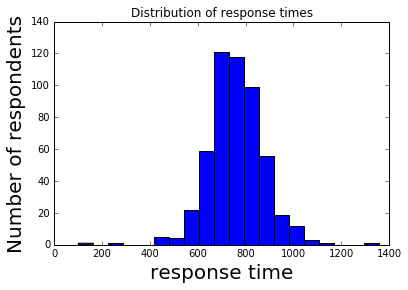

In [253]:
plt.hist(avg_rts['rt'], bins=20)
plt.xlabel('response time', fontsize=20)
plt.ylabel('Number of respondents', fontsize=20)
plt.title("Distribution of response times")

In [254]:
#load health outcomes
health  = pd.read_csv(os.path.join(sro_datadir, 'health.csv'),
                  index_col=0)
health

Nervous  Hopeless  RestlessFidgety  Depressed  EverythingIsEffort  \
s001      4.0       4.0              4.0        4.0                 4.0   
s002      0.0       1.0              1.0        0.0                 1.0   
s003      1.0       2.0              1.0        0.0                 1.0   
s004      0.0       0.0              0.0        0.0                 0.0   
s005      0.0       1.0              1.0        0.0                 2.0   
s006      0.0       0.0              0.0        0.0                 0.0   
s007      2.0       0.0              0.0        2.0                 1.0   
s008      0.0       1.0              2.0        2.0                 2.0   
s009      1.0       0.0              1.0        0.0                 1.0   
s010      1.0       0.0              1.0        0.0                 1.0   
s011      0.0       0.0              0.0        0.0                 0.0   
s012      4.0       4.0              4.0        4.0                 4.0   
s013      0.0       0.0              0.0        0.0                 0.0   
s014      0.0       0.0              0.0        0.0                 0.0   
s015      0.0       0.0              0.0        0.0                 0.0   
s016      1.0       0.0              1.0        0.0                 0.0   
s017      2.0       1.0              2.0        1.0                 2.0   
s018      1.0       0.0              1.0        0.0                 1.0   
s019      1.0       0.0              0.0        0.0                 0.0   
s020      0.0       1.0              2.0        1.0                 0.0   
s021      0.0       2.0              2.0        0.0                 1.0   
s023      0.0       1.0              1.0        0.0                 1.0   
s025      2.0       3.0              1.0        2.0                 2.0   
s026      1.0       0.0              1.0        0.0                 0.0   
s027      2.0       2.0              2.0        2.0                 2.0   
s028      1.0       1.0              2.0        1.0                 1.0   
s029      1.0       0.0              1.0        1.0                 3.0   
s030      1.0       0.0              1.0        0.0                 1.0   
s031      1.0       0.0              1.0        0.0                 0.0   
s032      0.0       0.0              1.0        0.0                 1.0   
...       ...       ...              ...        ...                 ...   
s522      2.0       1.0              4.0        1.0                 3.0   
s523      0.0       1.0              2.0        1.0                 1.0   
s524      3.0       1.0              2.0        1.0                 3.0   
s526      1.0       1.0              3.0        1.0                 1.0   
s527      3.0       2.0              2.0        1.0                 2.0   
s528      1.0       0.0              1.0        0.0                 2.0   
s529      0.0       0.0              1.0        0.0                 1.0   
s531      3.0       2.0              4.0        2.0                 2.0   
s533      0.0       0.0              0.0        0.0                 0.0   
s534      0.0       0.0              1.0        0.0                 1.0   
s535      2.0       0.0              1.0        1.0                 1.0   
s538      1.0       1.0              1.0        0.0                 1.0   
s539      3.0       2.0              2.0        2.0                 2.0   
s541      1.0       0.0              1.0        0.0                 0.0   
s542      0.0       0.0              0.0        0.0                 1.0   
s543      2.0       1.0              2.0        1.0                 1.0   
s544      1.0       0.0              0.0        0.0                 0.0   
s545      1.0       0.0              1.0        0.0                 2.0   
s546      2.0       0.0              3.0        0.0                 1.0   
s548      1.0       3.0              3.0        2.0                 3.0   
s549      0.0       0.0              1.0        0.0                 0.0   
s550      1.0       0.0        

In [255]:
health.columns

Index([u'Nervous', u'Hopeless', u'RestlessFidgety', u'Depressed',
       u'EverythingIsEffort', u'Worthless', u'Last30DaysUsual',
       u'DaysLostLastMonth', u'DaysHalfLastMonth', u'DoctorVisitsLastMonth',
       u'DaysPhysicalHealthFeelings', u'PsychDiagnoses',
       u'PsychDiagnosesOther', u'NeurologicalDiagnoses',
       u'NeurologicalDiagnosesDescribe', u'DiseaseDiagnoses',
       u'DiseaseDiagnosesOther'],
      dtype='object')

In [256]:
health.index

Index([u's001', u's002', u's003', u's004', u's005', u's006', u's007', u's008',
       u's009', u's010',
       ...
       u's549', u's550', u's551', u's552', u's553', u's554', u's556', u's557',
       u's559', u's560'],
      dtype='object', length=522)

In [257]:
#join the data up (naturally uses the index column, which is subject)
joined = health.join(avg_rts)
joined

Nervous  Hopeless  RestlessFidgety  Depressed  EverythingIsEffort  \
s001      4.0       4.0              4.0        4.0                 4.0   
s002      0.0       1.0              1.0        0.0                 1.0   
s003      1.0       2.0              1.0        0.0                 1.0   
s004      0.0       0.0              0.0        0.0                 0.0   
s005      0.0       1.0              1.0        0.0                 2.0   
s006      0.0       0.0              0.0        0.0                 0.0   
s007      2.0       0.0              0.0        2.0                 1.0   
s008      0.0       1.0              2.0        2.0                 2.0   
s009      1.0       0.0              1.0        0.0                 1.0   
s010      1.0       0.0              1.0        0.0                 1.0   
s011      0.0       0.0              0.0        0.0                 0.0   
s012      4.0       4.0              4.0        4.0                 4.0   
s013      0.0       0.0              0.0        0.0                 0.0   
s014      0.0       0.0              0.0        0.0                 0.0   
s015      0.0       0.0              0.0        0.0                 0.0   
s016      1.0       0.0              1.0        0.0                 0.0   
s017      2.0       1.0              2.0        1.0                 2.0   
s018      1.0       0.0              1.0        0.0                 1.0   
s019      1.0       0.0              0.0        0.0                 0.0   
s020      0.0       1.0              2.0        1.0                 0.0   
s021      0.0       2.0              2.0        0.0                 1.0   
s023      0.0       1.0              1.0        0.0                 1.0   
s025      2.0       3.0              1.0        2.0                 2.0   
s026      1.0       0.0              1.0        0.0                 0.0   
s027      2.0       2.0              2.0        2.0                 2.0   
s028      1.0       1.0              2.0        1.0                 1.0   
s029      1.0       0.0              1.0        1.0                 3.0   
s030      1.0       0.0              1.0        0.0                 1.0   
s031      1.0       0.0              1.0        0.0                 0.0   
s032      0.0       0.0              1.0        0.0                 1.0   
...       ...       ...              ...        ...                 ...   
s522      2.0       1.0              4.0        1.0                 3.0   
s523      0.0       1.0              2.0        1.0                 1.0   
s524      3.0       1.0              2.0        1.0                 3.0   
s526      1.0       1.0              3.0        1.0                 1.0   
s527      3.0       2.0              2.0        1.0                 2.0   
s528      1.0       0.0              1.0        0.0                 2.0   
s529      0.0       0.0              1.0        0.0                 1.0   
s531      3.0       2.0              4.0        2.0                 2.0   
s533      0.0       0.0              0.0        0.0                 0.0   
s534      0.0       0.0              1.0        0.0                 1.0   
s535      2.0       0.0              1.0        1.0                 1.0   
s538      1.0       1.0              1.0        0.0                 1.0   
s539      3.0       2.0              2.0        2.0                 2.0   
s541      1.0       0.0              1.0        0.0                 0.0   
s542      0.0       0.0              0.0        0.0                 1.0   
s543      2.0       1.0              2.0        1.0                 1.0   
s544      1.0       0.0              0.0        0.0                 0.0   
s545      1.0       0.0              1.0        0.0                 2.0   
s546      2.0       0.0              3.0        0.0                 1.0   
s548      1.0       3.0              3.0        2.0                 3.0   
s549      0.0       0.0              1.0        0.0                 0.0   
s550      1.0       0.0        

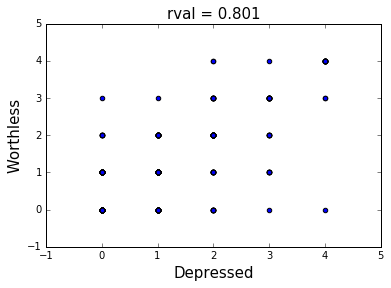

In [264]:
#let's visualize a relationship

val1 = 'Depressed'
val2 = 'Worthless'
plt.scatter(joined[val1], joined[val2])
plt.xlabel(val1, fontsize=15)
plt.ylabel(val2, fontsize=15)

import scipy.stats as stats
rval = stats.pearsonr(joined[val1], joined[val2])[0]
plt.title('rval = %.3f' % rval, fontsize=15)
#not obviously related

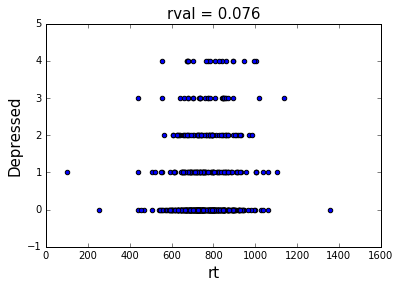

In [265]:
#let's visualize another relationship

val1 = 'rt'
val2 = 'Depressed'
plt.scatter(joined[val1], joined[val2])
plt.xlabel(val1, fontsize=15)
plt.ylabel(val2, fontsize=15)

import scipy.stats as stats
rval = stats.pearsonr(joined[val1], joined[val2])[0]
plt.title('rval = %.3f' % rval, fontsize=15)
#not obviously related

# Ventral Stream Dataset: The Images

In [267]:
"""
To go forward from here you'll have to download the "ventral_neural_data.hdf5" dataset that we
provide to students in this class.  Course staff provide you a download link in class or via Canvas.

Once you've downloaded the file, set the "DATA_PATH" variable below to be the path of 
the file on your computer. 
"""

DATA_PATH = "/mnt/data3/yamins/visual/ventral_neural_data.hdf5"

In [268]:
#import hdf5-handling package, called h5py
import h5py

In [269]:
#open the dataset 
Ventral_Dataset = h5py.File(DATA_PATH)

In [270]:
Ventral_Dataset

<HDF5 file "ventral_neural_data.hdf5" (mode r+)>

This data was originally collected for this paper:

Majaj, Najib J., Ha Hong, Ethan A. Solomon, and James J. DiCarlo. "Simple learned weighted sums of inferior temporal neuronal firing rates accurately predict human core object recognition performance." Journal of Neuroscience 35, no. 39 (2015): 13402-13418.

It has subsequently been used in:

Yamins Daniel LK, Ha Hong, Charles F. Cadieu, Ethan A. Solomon, Darren Seibert, and James J. DiCarlo. "Performance-optimized hierarchical models predict neural responses in higher visual cortex." Proceedings of the National Academy of Sciences 111, no. 23 (2014): 8619-8624.

Cadieu, Charles F., Ha Hong, Daniel LK Yamins, Nicolas Pinto, Diego Ardila, Ethan A. Solomon, Najib J. Majaj, and James J. DiCarlo. "Deep neural networks rival the representation of primate IT cortex for core visual object recognition." PLoS computational biology 10, no. 12 (2014): e1003963.

Hong, Ha, Daniel LK Yamins, Najib J. Majaj, and James J. DiCarlo. "Explicit information for category-orthogonal object properties increases along the ventral stream." Nature neuroscience 19, no. 4 (2016): 613.

In [271]:
#by looking at the "keys" attribute you can see what the parts of the dataset are
Ventral_Dataset.keys()

[u'image_meta',
 u'images',
 u'neural_meta',
 u'time_averaged',
 u'time_averaged_trial_averaged',
 u'time_binned',
 u'time_binned_trial_averaged']

In [272]:
#let's have a look at the "images" object
Ventral_Dataset['images']
#ok, so this is a tensor with 3 dimensions

<HDF5 dataset "images": shape (5760, 256, 256), type "|u1">

In [273]:
#what are these dimension?
all_images = Ventral_Dataset['images']
all_images.dims.keys()

[<"image" dimension 0 of HDF5 dataset at 140693154273712>,
 <"height" dimension 1 of HDF5 dataset at 140693154273712>,
 <"width" dimension 2 of HDF5 dataset at 140693154273712>]

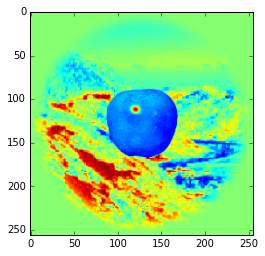

In [274]:
#hm.... why isn't there a 4th dimension for the color channel?
plt.imshow(all_images[0])
#looks weird!

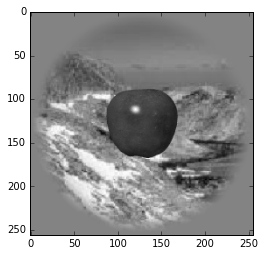

In [275]:
#maybe it's grayscale? 
plt.imshow(all_images[0], cmap='gray')
#aha!  so that's why there were only 3 dimensions in the tensor -- these are grayscale images

In [276]:
#what else is there? well, there was an "image_meta" object.  let's look at that.
Ventral_Dataset['image_meta']
#it's got some hierarchical structure under it.  

<HDF5 group "/image_meta" (10 members)>

In [277]:
#what are the objects hierarchical under image_meta?
Ventral_Dataset['image_meta'].keys()
#these look like meta fields for the images.  

[u'category',
 u'image_id',
 u'object_name',
 u'rotation_xy',
 u'rotation_xz',
 u'rotation_yz',
 u'size',
 u'translation_y',
 u'translation_z',
 u'variation_level']

In [278]:
#let's have a look at the "category" object
Ventral_Dataset['image_meta']['category']
#ok this is an array of the same length as the number of images (5760), but it's values are string-type (S7)

<HDF5 dataset "category": shape (5760,), type "|S7">

In [279]:
#what are the values?
Ventral_Dataset['image_meta']['category'][:10]
#ok they look like real English-language category names

array(['Fruits', 'Fruits', 'Fruits', 'Fruits', 'Fruits', 'Fruits',
       'Fruits', 'Fruits', 'Fruits', 'Fruits'], dtype='|S7')

In [280]:
#what are the unique values in the category field?  Let's use the "unique" function from the numpy library
np.unique(Ventral_Dataset['image_meta']['category'])
#ok, there are eight categories of obejcts in this dataset

array(['Animals', 'Boats', 'Cars', 'Chairs', 'Faces', 'Fruits', 'Planes',
       'Tables'], dtype='|S7')

In [281]:
#what are the unique values in the object_name field?  
print(np.unique(Ventral_Dataset['image_meta']['object_name']))
#ok, quite a few. 

['Apple_Fruit_obj' 'Apricot_obj' 'BAHRAIN' 'Beetle' 'CGTG_L' 'DTUG_L'
 'ELEPHANT_M' 'GORILLA' 'LIONESS' 'MQUEEN_L' 'Peach_obj' 'Pear_obj'
 'SISTER_L' 'Strawberry_obj' 'TURTLE_L' '_001' '_004' '_008' '_010' '_011'
 '_014' '_01_Airliner_2jetEngines' '_031' '_033' '_05_future' '_08' '_10'
 '_11' '_12' '_18' '_19_flyingBoat' '_37' '_38' '_44' 'alfa155' 'astra'
 'bear' 'blCow' 'bmw325' 'bora_a' 'breed_pug' 'celica' 'clio' 'cruiser'
 'f16' 'face0001' 'face0002' 'face0003' 'face0004' 'face0005' 'face0006'
 'face0007' 'face0008' 'hedgehog' 'junkers88' 'mig29' 'motoryacht'
 'raspberry_obj' 'rdbarren' 'sopwith' 'support' 'walnut_obj'
 'watermelon_obj' 'z3']


In [282]:
#let's print out a programmatically-constructed sentence telling us how many objects there are
unique_objects = np.unique(Ventral_Dataset['image_meta']['object_name'])
number_unique_objects = len(unique_objects)
print('There are %d unique objects' % number_unique_objects)

There are 64 unique objects


In [283]:
#What's the relationship beween the categories and the objects?
categories = Ventral_Dataset['image_meta']['category'][:]   #array of category labels for all images  --> shape == (5760,)
unique_categories = np.unique(categories)                #array of unique category labels --> shape == (8,)
objects = Ventral_Dataset['image_meta']['object_name'][:]   #array of object labels for all images --> shape == (5670,)
unique_objects = np.unique(objects)                      #array of unique object labels --> shape == (64,) 

#now let's use what we just defined to create a dictionary whose keys are categories and whose values
#are arays of unique objects in each category
objects_by_category = {c: np.unique(objects[categories == c]) 
                       for c in unique_categories}

In [284]:
#see, the keys of this dictionary are the different categories
objects_by_category.keys()

['Tables', 'Animals', 'Chairs', 'Cars', 'Faces', 'Planes', 'Fruits', 'Boats']

In [285]:
#and the value of the "Animals" key is an array containing some animal names
objects_by_category['Animals']

array(['ELEPHANT_M', 'GORILLA', 'LIONESS', 'TURTLE_L', 'bear', 'blCow',
       'breed_pug', 'hedgehog'], dtype='|S24')

In [286]:
objects_by_category['Chairs']

array(['_001', '_004', '_008', '_010', '_011', '_014', '_031', '_033'],
      dtype='|S24')

In [287]:
objects_by_category['Faces']

array(['face0001', 'face0002', 'face0003', 'face0004', 'face0005',
       'face0006', 'face0007', 'face0008'], dtype='|S24')

In [288]:
#how many of each type of category are there? 
{c: len(objects_by_category[c]) for c in unique_categories}
#ok, so there are 8 objects of each category, for each of 8 categories (making up the 64 objects)

{'Animals': 8,
 'Boats': 8,
 'Cars': 8,
 'Chairs': 8,
 'Faces': 8,
 'Fruits': 8,
 'Planes': 8,
 'Tables': 8}

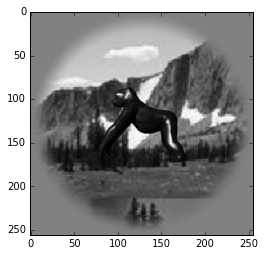

In [289]:
#let's look at an image of one of the animals
first_gorilla_index = (objects == 'GORILLA').nonzero()[0][0]
first_gorilla_image = all_images[first_gorilla_index]
plt.imshow(first_gorilla_image, cmap='gray')

In [290]:
plt.plot?

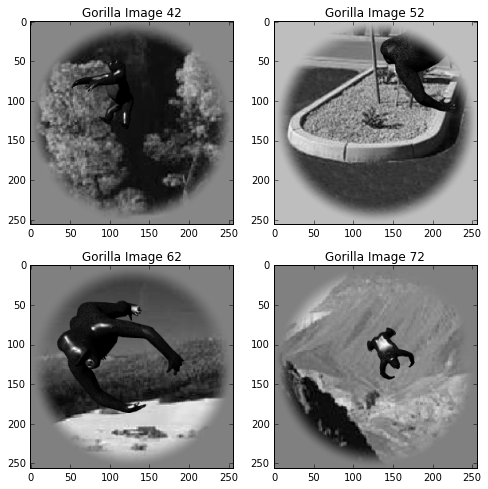

In [291]:
#let's look at some more images
gorilla_indices = (objects == 'GORILLA').nonzero()[0]
random_choices = [41, 51, 61, 71]
various_gorilla_images = [all_images[gorilla_indices[ind]] for ind in random_choices]
plt.figure(figsize=(8, 8))
for j in range(4):
    plt.subplot(2, 2, j+1)
    plt.imshow(various_gorilla_images[j], cmap='gray')
    plt.title('Gorilla Image %d' % (random_choices[j]+1))
#ok so it looks like we're looking at the same gorilla object from many different angles and magnifications
#on all sorts of different randomly chosen backgrounds

In [292]:
#let's look at a different field in the image meta for a moment
sizes = Ventral_Dataset['image_meta']['size']
sizes

<HDF5 dataset "size": shape (5760,), type "<f8">

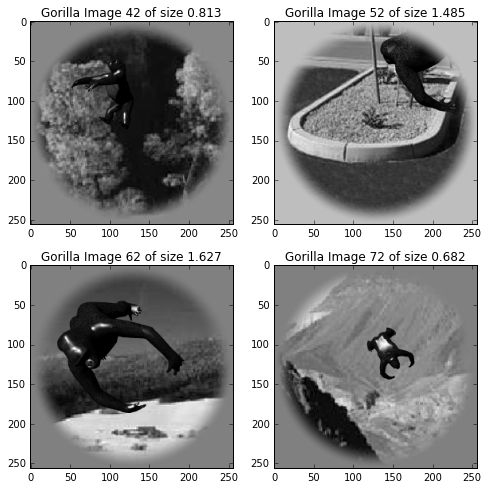

In [293]:
#let's visualize the size next to the gorilla images
gorilla_indices = (objects == 'GORILLA').nonzero()[0]
random_choices = [41, 51, 61, 71]
various_gorilla_images = [all_images[gorilla_indices[ind]] for ind in random_choices]
plt.figure(figsize=(8, 8))
for j in range(4):
    plt.subplot(2, 2, j+1)
    plt.imshow(various_gorilla_images[j], cmap='gray')
    plt.title('Gorilla Image %d of size %.3f' % (random_choices[j]+1, 
                                                 sizes[gorilla_indices[random_choices[j]]]))
#right -- so the size corresponds to the magnification of the objects in the image

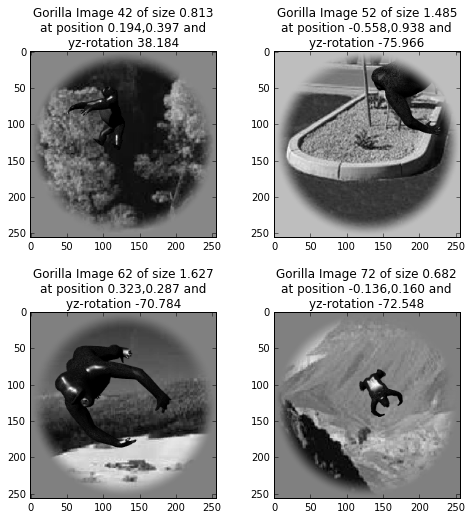

In [294]:
#let's visualize a bunch of oter metadata properties

ty = Ventral_Dataset['image_meta']['translation_y']
tz = Ventral_Dataset['image_meta']['translation_z']
rotyz = Ventral_Dataset['image_meta']['rotation_yz']

gorilla_indices = (objects == 'GORILLA').nonzero()[0]
random_choices = [41, 51, 61, 71]
various_gorilla_images = [all_images[gorilla_indices[ind]] for ind in random_choices]
plt.figure(figsize=(8, 8))
for j in range(4):
    plt.subplot(2, 2, j+1)
    plt.imshow(various_gorilla_images[j], cmap='gray')
    plt.title('Gorilla Image %d of size %.3f\nat position %.3f,%.3f and\nyz-rotation %.3f' % 
                                                (random_choices[j]+1, 
                                                 sizes[gorilla_indices[random_choices[j]]],
                                                 ty[gorilla_indices[random_choices[j]]],
                                                 tz[gorilla_indices[random_choices[j]]],
                                                 rotyz[gorilla_indices[random_choices[j]]]))
plt.subplots_adjust(hspace=0.4)

In [295]:
#look at that last key -- "variation_level"
Ventral_Dataset['image_meta'].keys()

[u'category',
 u'image_id',
 u'object_name',
 u'rotation_xy',
 u'rotation_xz',
 u'rotation_yz',
 u'size',
 u'translation_y',
 u'translation_z',
 u'variation_level']

In [296]:
#we can see that there are three unique values in the variation_level field:
var_level = Ventral_Dataset['image_meta']['variation_level'][:]
np.unique(var_level)

array(['V0', 'V3', 'V6'], dtype='|S2')

In [297]:
#hat are the y positions of the objects with variation level V0?
ypos_at_v0 = ty[var_level == 'V0']
print(ypos_at_v0[:20])
print('V0 ty min --> %.2f' % ypos_at_v0.min())
print('V0 ty max --> %.2f' % ypos_at_v0.max())
#they're all 0

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
V0 ty min --> 0.00
V0 ty max --> 0.00


In [298]:
#and the higher variation levels have more ... well, variation 
ypos_at_v3 = ty[var_level == 'V3']
print('V3 ty min --> %.2f' % ypos_at_v3.min())
print('V3 ty max --> %.2f' % ypos_at_v3.max())

ypos_at_v6 = ty[var_level == 'V6']
print('V6 ty min --> %.2f' % ypos_at_v6.min())
print('V6 ty max --> %.2f'% ypos_at_v6.max())

V3 ty min --> -0.30
V3 ty max --> 0.30
V6 ty min --> -0.60
V6 ty max --> 0.60


### The Neural Data Itself

In [299]:
#let's look at some of the other objects in the dataset
Ventral_Dataset['time_averaged_trial_averaged']

<HDF5 dataset "time_averaged_trial_averaged": shape (5760, 296), type "<f4">

In [300]:
#ok this key has two dimensions, with suggestive names
Ventral_Dataset['time_averaged_trial_averaged'].dims.keys()

[<"image" dimension 0 of HDF5 dataset at 140693083284592>,
 <"neuron" dimension 1 of HDF5 dataset at 140693083284592>]

In [301]:
#response of the first 5 neurons to the first stimulus (that floating apple from above)
Neural_Data = Ventral_Dataset['time_averaged_trial_averaged']
Neural_Data[0][:5]

array([-0.08108135, -0.2099618 ,  0.11562751, -0.43792772,  0.10511396],
      dtype=float32)

In [302]:
#what types of metadata about the neurons are there? 
Ventral_Dataset['neural_meta'].keys()

[u'AIT_NEURONS',
 u'ANIMAL_INFO',
 u'ARRAY_INFO',
 u'CIT_NEURONS',
 u'IT_NEURONS',
 u'PIT_NEURONS',
 u'V4_NEURONS']

In [303]:
#these are indices into the neurons dimension, defining different subsets of neurons
#in different brain areas
V4_NEURONS = Ventral_Dataset['neural_meta']['V4_NEURONS'][:]
print(V4_NEURONS)
print('\nThere are %d V4 neurons' % len(V4_NEURONS))

IT_NEURONS = Ventral_Dataset['neural_meta']['IT_NEURONS'][:]
print(IT_NEURONS)
print('\n There are %d IT neurons' % len(IT_NEURONS))

[ 11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28
  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 163 164
 165 166 167 168 169 170 211 212 213 214 215 216 217 218 219 220 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295]

There are 128 V4 neurons
[  0   1   2   3   4   5   6   7   8   9  10  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 18

In [304]:
#we can create subsets of the neural data corresponding to different columns -- e.g. different groups of neurons
V4_Neural_Data = Neural_Data[:, V4_NEURONS]
print('V4 neural data shape is %d images X %d V4 neurons' % V4_Neural_Data.shape)

IT_Neural_Data = Neural_Data[:, IT_NEURONS]
print('IT neural data shape is %d images X %d IT neurons' % IT_Neural_Data.shape)


V4 neural data shape is 5760 images X 128 V4 neurons
IT neural data shape is 5760 images X 168 IT neurons


In [305]:
#digging a little deeper, there are data at finer levels of resolution -- split by level of variation
Ventral_Dataset['time_averaged'].keys()

[u'variation_level_0', u'variation_level_3', u'variation_level_6']

In [306]:
#the dimensions of this dataset are no longer trial averaged -- now we see dimensions
#of trials X images X nerons
Ventral_Dataset['time_averaged']['variation_level_0'].dims.keys()

[<"trial" dimension 0 of HDF5 dataset at 140693083453680>,
 <"image" dimension 1 of HDF5 dataset at 140693083453680>,
 <"neuron" dimension 2 of HDF5 dataset at 140693083453680>]

In [307]:
#we can see that 28 repeats each of the 640 variation level 0 images were collected
Ventral_Dataset['time_averaged']['variation_level_0']

<HDF5 dataset "variation_level_0": shape (28, 640, 296), type "<f4">

In [308]:
#complicating things a little are that the repeats are different for different variation levels
#apparently, the variation levels were collected separately and more repeats were collected for each of 2560
#medium and high variation level images (51 and 47 respectively) than for the low variation subset of images
print(Ventral_Dataset['time_averaged']['variation_level_3'])
print(Ventral_Dataset['time_averaged']['variation_level_6'])

<HDF5 dataset "variation_level_3": shape (51, 2560, 296), type "<f4">
<HDF5 dataset "variation_level_6": shape (47, 2560, 296), type "<f4">


In [309]:
#there's even one level more detailed:
Ventral_Dataset['time_binned'].keys()
#there's data for each 20ms timebin

[u'0ms',
 u'100ms',
 u'120ms',
 u'140ms',
 u'160ms',
 u'180ms',
 u'200ms',
 u'20ms',
 u'40ms',
 u'60ms',
 u'80ms']

In [310]:
#again, broken down by variation level
Ventral_Dataset['time_binned']['40ms'].keys()

[u'variation_level_0', u'variation_level_3', u'variation_level_6']

In [311]:
#again, in the form of trials X images X neurons
print(Ventral_Dataset['time_binned']['40ms']['variation_level_0'])
Ventral_Dataset['time_binned']['40ms']['variation_level_0'].dims.keys()

<HDF5 dataset "variation_level_0": shape (29, 640, 296), type "<f4">


[<"trial" dimension 0 of HDF5 dataset at 140693084332304>,
 <"image" dimension 1 of HDF5 dataset at 140693084332304>,
 <"neuron" dimension 2 of HDF5 dataset at 140693084332304>]

In [312]:
#this data is aggregated into a trial-averaged form
Ventral_Dataset['time_binned_trial_averaged']

<HDF5 dataset "time_binned_trial_averaged": shape (5760, 11, 296), type "<f4">

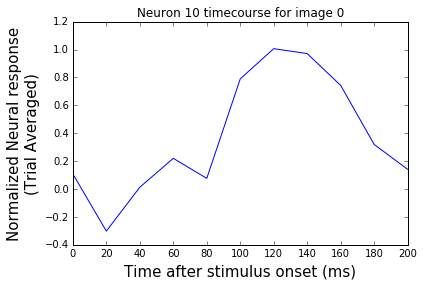

In [313]:
#here's the timecourse the trial-averaged response of 11th neuron to the first image
neuron_index = 10
image_index = 0
plt.plot(Ventral_Dataset['time_binned_trial_averaged'][image_index, :, neuron_index])
plt.xlabel('Time after stimulus onset (ms)', fontsize=15)
plt.xticks(np.arange(11), np.arange(11) * 20)
plt.ylabel('Normalized Neural response\n(Trial Averaged)', fontsize=15)
plt.title('Neuron %d timecourse for image %d' % (neuron_index, image_index))

In [314]:
#let's lok at the data a little bit more

V4_Gorilla_Data = V4_Neural_Data[objects == 'GORILLA']
V4_Gorilla_Data.shape

(90, 128)

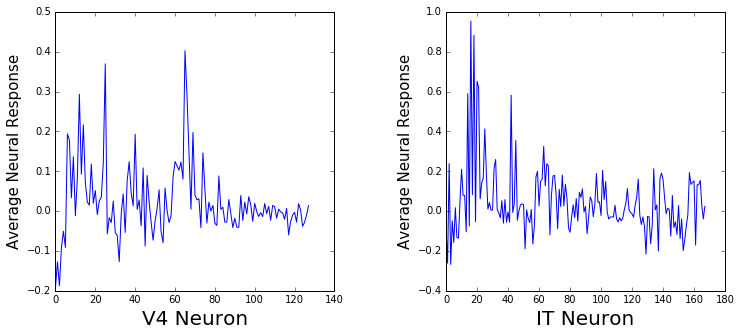

In [330]:
#let's plot the response of each neuron to the mean over Gorilla images

#... for V4
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
V4_Gorilla_Pattern = V4_Gorilla_Data.mean(0)
plt.plot(V4_Gorilla_Pattern)
plt.xlabel('V4 Neuron', fontsize=20)
plt.ylabel('Average Neural Response', fontsize=15)

#... for IT
plt.subplot(1, 2, 2)
IT_Gorilla_Data = IT_Neural_Data[objects == 'GORILLA']
IT_Gorilla_Pattern = IT_Gorilla_Data.mean(0)
plt.plot(IT_Gorilla_Pattern)
plt.xlabel('IT Neuron', fontsize=20)
plt.ylabel('Average Neural Response', fontsize=15)
plt.subplots_adjust(wspace=0.4)

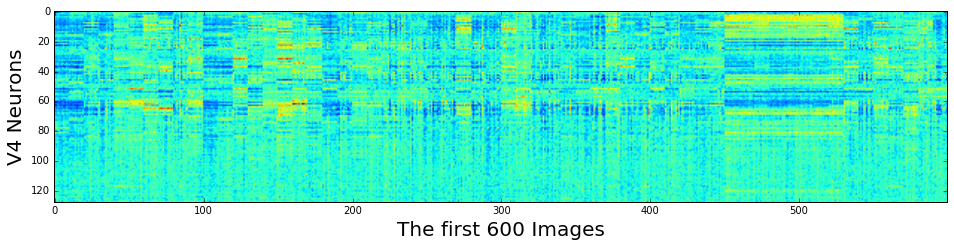

In [316]:
#in fact, let's look at responses to a bunch of individual images across neurons, as a heatmap

N_images = 600
plt.figure(figsize=(16,5))
plt.imshow(V4_Neural_Data[:N_images].T)
plt.xlabel('The first %d Images' % N_images, fontsize=20)
plt.ylabel('V4 Neurons', fontsize=20)

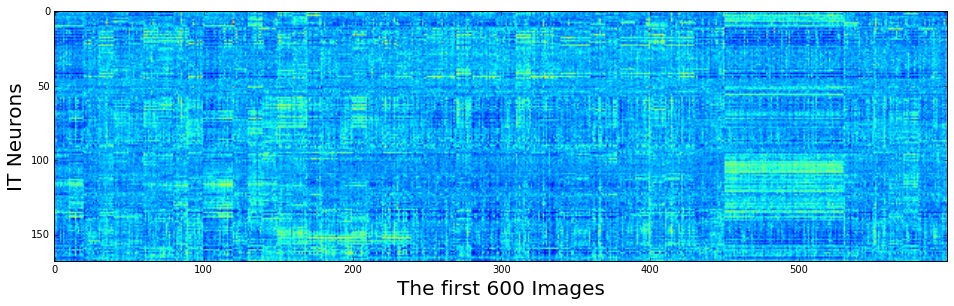

In [317]:
N_images = 600
plt.figure(figsize=(16,5))
plt.imshow(IT_Neural_Data[:N_images].T)
plt.xlabel('The first %d Images' % N_images, fontsize=20)
plt.ylabel('IT Neurons', fontsize=20)

In [321]:
#actually, let's look at mean responses over objects, organized by category
V4_object_means_by_category = np.row_stack([[V4_Neural_Data[objects == o].mean(0) for o in objects_by_category[c]]
                                                                for c in unique_categories])
V4_object_means_by_category.shape

(64, 128)

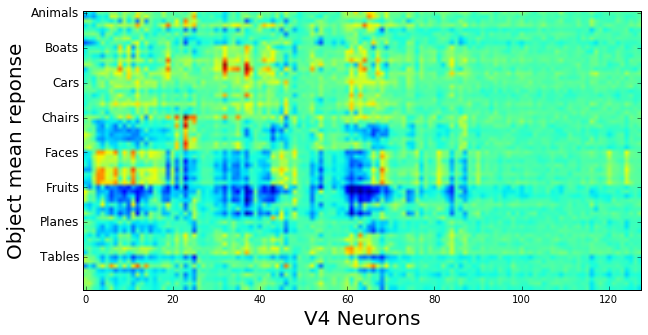

In [322]:
plt.figure(figsize=(12, 5))
plt.imshow(V4_object_means_by_category)
plt.xlabel('V4 Neurons', fontsize=20)
plt.ylabel('Object mean reponse', fontsize=20)
plt.yticks(np.arange(0, 64, 8), unique_categories, fontsize=12);

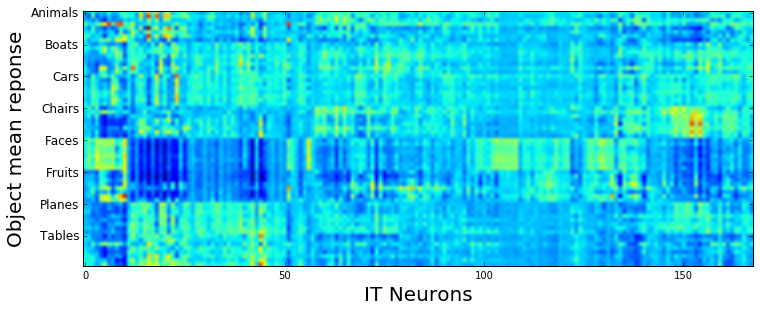

In [323]:
IT_object_means_by_category = np.row_stack([[IT_Neural_Data[objects == o].mean(0) for o in objects_by_category[c]]
                                                                for c in unique_categories])
IT_object_means_by_category.shape

plt.figure(figsize=(12, 5))
plt.imshow(IT_object_means_by_category)
plt.xlabel('IT Neurons', fontsize=20)
plt.ylabel('Object mean reponse', fontsize=20)
plt.yticks(np.arange(0, 64, 8), unique_categories, fontsize=12);

In [340]:
Ventral_Dataset['neural_meta']['ANIMAL_INFO'][:]

array(['Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo',
       'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo',
       'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo',
       'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo',
       'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo',
       'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo',
       'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo',
       'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo',
       'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo',
       'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo',
       'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo',
       'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo',
       'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo',
       'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo', 'Chabo',
       'Chabo', 'Cha

In [342]:
Ventral_Dataset['neural_meta']['IT_NEURONS'][:]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
       208, 209, 210, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255])

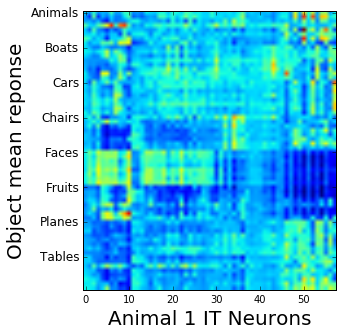

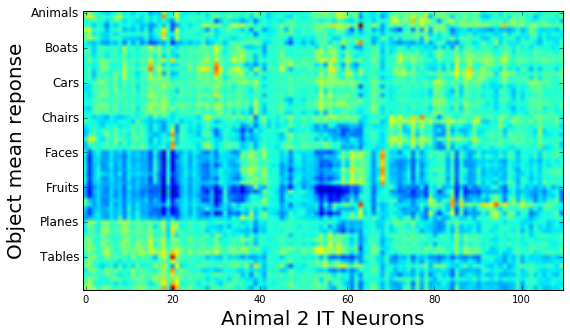

In [353]:
animal1 = Ventral_Dataset['neural_meta']['ANIMAL_INFO'][:] == 'Chabo'
animal2 = Ventral_Dataset['neural_meta']['ANIMAL_INFO'][:] == 'Tito'
animal1_IT_Data = Neural_Data[:, animal1[IT_NEURONS]]
animal2_IT_Data = Neural_Data[:, animal2[IT_NEURONS]]


animal1_IT_object_means_by_category = np.row_stack([[animal1_IT_Data[objects == o].mean(0) for o in objects_by_category[c]]
                                                                for c in unique_categories])

plt.figure(figsize=(12, 5))
plt.imshow(animal1_IT_object_means_by_category)
plt.xlabel('Animal 1 IT Neurons', fontsize=20)
plt.ylabel('Object mean reponse', fontsize=20)
plt.yticks(np.arange(0, 64, 8), unique_categories, fontsize=12);

animal2_IT_object_means_by_category = np.row_stack([[animal2_IT_Data[objects == o].mean(0) for o in objects_by_category[c]]
                                                                for c in unique_categories])

plt.figure(figsize=(12, 5))
plt.imshow(animal2_IT_object_means_by_category)
plt.xlabel('Animal 2 IT Neurons', fontsize=20)
plt.ylabel('Object mean reponse', fontsize=20)
plt.yticks(np.arange(0, 64, 8), unique_categories, fontsize=12);



## Example 3: WordBank data

In [333]:
wordbank_path = '/mnt/data3/yamins/wordbank'
os.listdir(wordbank_path)

['instrument_data_spanish_(european).csv',
 'item_data_russian.csv',
 'by_child.csv',
 'instrument_data_mandarin_(beijing).csv',
 'instrument_data_cantonese.csv',
 'item_data_turkish.csv',
 'item_data_portuguese.csv',
 'item_data_spanish.csv',
 'instrument_data_swedish.csv',
 'instrument_data_czech.csv',
 'item_data_slovak.csv',
 'instrument_data_english_(american).csv',
 'instrument_data_norwegian.csv',
 'item_data_croatian.csv',
 'item_data_mandarin.csv',
 'item_data_swedish.csv',
 'item_data_czech.csv',
 'item_data_danish.csv',
 'item_data_french_(french).csv',
 'instrument_data_danish.csv',
 'instrument_data_korean.csv',
 'item_data_italian.csv',
 'instrument_data_german.csv',
 'instrument_data_slovak.csv',
 'instrument_data_hebrew.csv',
 'instrument_data_french_(french).csv',
 'instrument_data_kigiriama.csv',
 'instrument_data_greek_(cypriot).csv',
 'instrument_data_italian.csv',
 'instrument_data_turkish.csv',
 'instrument_data_croatian.csv',
 'item_data_kigiriama.csv',
 'instrum

### basic data exploration

In [335]:
english_data = pd.read_csv(os.path.join(wordbank_path, 'instrument_data_english_(american).csv'))

In [336]:
len(english_data)

4399440

In [43]:
english_data.columns

Index([u'data_id', u'age', u'sex', u'mom_ed', u'value', u'item_id', u'type',
       u'category', u'definition'],
      dtype='object')

In [44]:
english_data[:10]

data_id  age     sex          mom_ed     value  item_id  type category  \
0   129242   27  Female  Some Secondary  produces   item_1  word   sounds   
1   129242   27  Female  Some Secondary       NaN   item_2  word   sounds   
2   129242   27  Female  Some Secondary       NaN   item_3  word   sounds   
3   129242   27  Female  Some Secondary  produces   item_4  word   sounds   
4   129242   27  Female  Some Secondary       NaN   item_5  word   sounds   
5   129242   27  Female  Some Secondary       NaN   item_6  word   sounds   
6   129242   27  Female  Some Secondary  produces   item_7  word   sounds   
7   129242   27  Female  Some Secondary       NaN   item_8  word   sounds   
8   129242   27  Female  Some Secondary  produces   item_9  word   sounds   
9   129242   27  Female  Some Secondary       NaN  item_10  word   sounds   

       definition  
0         baa baa  
1       choo choo  
2  cockadoodledoo  
3            grrr  
4            meow  
5             moo  
6            ouch  
7     quack quack  
8           uh oh  
9           vroom

In [45]:
cantonese_data = pd.read_csv('/mnt/data3/yamins/wordbank/instrument_data_cantonese.csv')

In [46]:
cantonese_data[:10]

data_id  age   sex  mom_ed     value  item_id  type category  \
0    39414   17  Male     NaN       NaN   item_1  word   sounds   
1    39414   17  Male     NaN  produces   item_2  word   sounds   
2    39414   17  Male     NaN       NaN   item_3  word   sounds   
3    39414   17  Male     NaN  produces   item_4  word   sounds   
4    39414   17  Male     NaN       NaN   item_5  word   sounds   
5    39414   17  Male     NaN  produces   item_6  word   sounds   
6    39414   17  Male     NaN       NaN   item_7  word   sounds   
7    39414   17  Male     NaN       NaN   item_8  word   sounds   
8    39414   17  Male     NaN       NaN   item_9  word   sounds   
9    39414   17  Male     NaN  produces  item_10  word   sounds   

       definition  
0  Bom Bang (撞擊聲)  
1          喂?/ 喂!  
2              哎吔  
3    Mem Mem (好味)  
4         𠼭𠼭 (車聲)  
5   Bi Boo (救傷車聲)  
6         嘭嘭 (槍聲)  
7   Wou Wou (狗吠聲)  
8         喵 (貓叫聲)  
9        咩咩 (羊叫聲)

In [62]:
croatian_data_by_utterance_path = os.path.join(wordbank_path, 'instrument_data_croatian.csv')
croatian_data = pd.read_csv(croatian_data_by_utterance_path)
croatian_data[:10]

data_id  age     sex  mom_ed     value  item_id  type category  \
0    30071   30  Female     NaN       NaN   item_1  word   sounds   
1    30071   30  Female     NaN  produces   item_2  word   sounds   
2    30071   30  Female     NaN       NaN   item_3  word   sounds   
3    30071   30  Female     NaN  produces   item_4  word   sounds   
4    30071   30  Female     NaN  produces   item_5  word   sounds   
5    30071   30  Female     NaN       NaN   item_6  word   sounds   
6    30071   30  Female     NaN  produces   item_7  word   sounds   
7    30071   30  Female     NaN  produces   item_8  word   sounds   
8    30071   30  Female     NaN  produces   item_9  word   sounds   
9    30071   30  Female     NaN  produces  item_10  word   sounds   

      definition  
0        brr-brr  
1          Ga-ga  
2            grr  
3            jao  
4  ku-ku (sound)  
5     kukurikuuu  
6        kva-kva  
7          mijau  
8            muu  
9      njam-njam

In [57]:
by_child_path = os.path.join(wordbank_path, 'by_child.csv')
by_child_data = pd.read_csv(by_child_path)
by_child_data[:10]

data_id  language form  age  gender mom_ed  comprehension  production
0  29821.0  Croatian   WG   13  Female    NaN            293          88
1  29822.0  Croatian   WG   16    Male    NaN            122          12
2  29823.0  Croatian   WG    9  Female    NaN              3           0
3  29824.0  Croatian   WG   12  Female    NaN              0           0
4  29825.0  Croatian   WG   12  Female    NaN             44           0
5  29826.0  Croatian   WG    8    Male    NaN             14           5
6  29827.0  Croatian   WG    9    Male    NaN              2           1
7  29828.0  Croatian   WG   10    Male    NaN             44           1
8  29829.0  Croatian   WG   13    Male    NaN            172          51
9  29830.0  Croatian   WG   16    Male    NaN            241          68

### look at data completeness issue? 

In [359]:
languages = ['cantonese', 'croatian', 'czech', 'danish', 'english (american)', 'french (french)', 'german', 
             'greek (cypriot)', 'hebrew', 'italian', 'kigiriama', 'kiswahili', 
             'korean', 'latvian', 'mandarin (beijing)', 'norwegian', 'portuguese (european)', 
             'russian', 'slovak', 'spanish (european)', 'swedish', 'turkish']
len(languages)

22

In [109]:
all_ids = by_child_data['data_id']

missing_children = {}
for l in languages:
    by_utterance_path = os.path.join(wordbank_path, 'instrument_data_%s.csv' % l.replace(' ', '_'))
    lang_data = pd.read_csv(by_utterance_path)
    lang_ids_from_child_data = all_ids[by_child_data['language'].str.lower() == l]
    accounted_for = lang_ids_from_child_data.isin(lang_data['data_id'])
    
    not_accounted_for = np.invert(accounted_for)
    missing_children[l] = list(lang_ids_from_child_data[not_accounted_for])
    
    left_over = np.invert(lang_data['data_id'].isin(lang_ids_from_child_data))
    left_overs = lang_data[left_over]
    
    remaining_children = lang_ids_from_child_data[accounted_for]
    print('Missing children for %s: %d. Remaining: %d. Left over: %d' % (l, len(missing_children[l]), 
                                                                         len(remaining_children),
                                                                         len(left_overs)))
    

Missing children for cantonese: 0. Remaining: 987. Left over: 0
Missing children for croatian: 250. Remaining: 377. Left over: 0
Missing children for czech: 0. Remaining: 493. Left over: 0
Missing children for danish: 2398. Remaining: 3714. Left over: 0
Missing children for english (american): 2435. Remaining: 5520. Left over: 0
Missing children for french (french): 222. Remaining: 641. Left over: 0
Missing children for german: 0. Remaining: 1181. Left over: 0
Missing children for greek (cypriot): 0. Remaining: 176. Left over: 0
Missing children for hebrew: 61. Remaining: 479. Left over: 0
Missing children for italian: 648. Remaining: 752. Left over: 0
Missing children for kigiriama: 118. Remaining: 88. Left over: 0
Missing children for kiswahili: 41. Remaining: 87. Left over: 0
Missing children for korean: 618. Remaining: 1370. Left over: 0
Missing children for latvian: 183. Remaining: 500. Left over: 0
Missing children for mandarin (beijing): 882. Remaining: 1056. Left over: 0
Missin

### what does the by-child summary actually summarize?

In [110]:
#to figure out what the by-child summary actually summarizes, 
#let's look at a single record

by_child_data[by_child_data['data_id'] == 30071]

data_id  language form  age  gender mom_ed  comprehension  production
250  30071.0  Croatian   WS   30  Female    NaN            462         462

In [138]:
#ok now let's look at the data for that same subject
some_data = croatian_data[croatian_data['data_id'] == 30071]
some_data

data_id  age     sex  mom_ed     value   item_id  type          category  \
0      30071   30  Female     NaN       NaN    item_1  word            sounds   
1      30071   30  Female     NaN  produces    item_2  word            sounds   
2      30071   30  Female     NaN       NaN    item_3  word            sounds   
3      30071   30  Female     NaN  produces    item_4  word            sounds   
4      30071   30  Female     NaN  produces    item_5  word            sounds   
5      30071   30  Female     NaN       NaN    item_6  word            sounds   
6      30071   30  Female     NaN  produces    item_7  word            sounds   
7      30071   30  Female     NaN  produces    item_8  word            sounds   
8      30071   30  Female     NaN  produces    item_9  word            sounds   
9      30071   30  Female     NaN  produces   item_10  word            sounds   
10     30071   30  Female     NaN  produces   item_11  word            sounds   
11     30071   30  Female     NaN  produces   item_12  word            sounds   
12     30071   30  Female     NaN  produces   item_13  word           animals   
13     30071   30  Female     NaN  produces   item_14  word           animals   
14     30071   30  Female     NaN  produces   item_15  word           animals   
15     30071   30  Female     NaN  produces   item_16  word           animals   
16     30071   30  Female     NaN  produces   item_17  word           animals   
17     30071   30  Female     NaN       NaN   item_18  word           animals   
18     30071   30  Female     NaN  produces   item_19  word           animals   
19     30071   30  Female     NaN  produces   item_20  word           animals   
20     30071   30  Female     NaN       NaN   item_21  word           animals   
21     30071   30  Female     NaN       NaN   item_22  word           animals   
22     30071   30  Female     NaN  produces   item_23  word           animals   
23     30071   30  Female     NaN  produces   item_24  word           animals   
24     30071   30  Female     NaN       NaN   item_25  word           animals   
25     30071   30  Female     NaN  produces   item_26  word           animals   
26     30071   30  Female     NaN  produces   item_27  word           animals   
27     30071   30  Female     NaN  produces   item_28  word           animals   
28     30071   30  Female     NaN  produces   item_29  word           animals   
29     30071   30  Female     NaN       NaN   item_30  word           animals   
..       ...  ...     ...     ...       ...       ...   ...               ...   
687    30071   30  Female     NaN       NaN  item_688  word     helping_verbs   
688    30071   30  Female     NaN  produces  item_689  word     helping_verbs   
689    30071   30  Female     NaN       NaN  item_690  word     helping_verbs   
690    30071   30  Female     NaN       NaN  item_691  word     helping_verbs   
691    30071   30  Female     NaN       NaN  item_692  word     helping_verbs   
692    30071   30  Female     NaN       NaN  item_693  word     helping_verbs   
693    30071   30  Female     NaN  produces  item_694  word     helping_verbs   
694    30071   30  Female     NaN       NaN  item_695  word     helping_verbs   
695    30071   30  Female     NaN       NaN  item_696  word     helping_verbs   
696    30071   30  Female     NaN  produces  item_697  word     helping_verbs   
697    30071   30  Female     NaN       NaN  item_698  word     helping_verbs   
698    30071   30  Female     NaN       NaN  item_699  word     helping_verbs   
699    30071   30  Female     NaN  produces  item_700  word     helping_verbs   
700    30071   30  Female     NaN  produces  item_701  word     helping_verbs   
701    30071   30  Female     NaN  produces  item_702  word     helping_verbs   
702    30071   30  Female     NaN       NaN  item_703  word     helping_verbs   
703    30071   30  Female     NaN       NaN  item_704  word     helping_verbs   
704    30071   30  Female     NaN   

In [115]:
#this column is probably not relevant to our goal
np.unique(some_data['type'])

array(['word'], dtype=object)

In [113]:
#nor does this one seem to be
np.unique(some_data['category'])

array(['action_words', 'animals', 'body_parts', 'clothing',
       'connecting_words', 'descriptive_words', 'food_drink',
       'furniture_rooms', 'games_routines', 'helping_verbs', 'household',
       'locations', 'outside', 'people', 'places', 'pronouns',
       'quantifiers', 'question_words', 'sounds', 'time_words', 'toys',
       'vehicles'], dtype=object)

In [139]:
#nor this --- interesting, this must be in months
#and also it must have been just one time point for each child in the dataset
np.unique(some_data['age'])

array([30])

In [116]:
#what about this column?
np.unique(some_data['value'])

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [121]:
#how many records have value == 'produces'?
len(some_data[some_data['value'] == 'produces'])
#ah!! so this probably what the summary is summarizing -- a key variable of interest

462

In [355]:
#let's look at another child to be sure
croatian_data[-1:]

data_id  age     sex  mom_ed value   item_id  type          category  \
270308    30447   16  Female     NaN   NaN  item_717  word  connecting_words   

       definition  
270308       tako

In [128]:
#this is the id of the subject
id_to_check = 30447

#this is what we think the summary is summarizing -- how maby records for that subject with value == 'produces'
produces_truefalse = (croatian_data['data_id'] == id_to_check) & (croatian_data['value'] == 'produces')

#here's the actual number of such records
produces_truefalse.sum()

16

In [130]:
#now let's go back and look at the summary data
by_child_data[by_child_data['data_id'] == id_to_check]
#yep, it checks out!

data_id  language form  age  gender mom_ed  comprehension  production
626  30447.0  Croatian   WS   16  Female    NaN             16          16

In [131]:
#we can check a few more
by_child_data[by_child_data['language'] == 'Croatian'][-10:]

data_id  language form  age  gender mom_ed  comprehension  production
617  30438.0  Croatian   WS   27    Male    NaN            289         289
618  30439.0  Croatian   WS   24    Male    NaN            376         376
619  30440.0  Croatian   WS   22    Male    NaN             42          42
620  30441.0  Croatian   WS   20    Male    NaN             35          35
621  30442.0  Croatian   WS   22    Male    NaN            257         257
622  30443.0  Croatian   WS   27  Female    NaN            391         391
623  30444.0  Croatian   WS   16  Female    NaN              9           9
624  30445.0  Croatian   WS   16    Male    NaN             83          83
625  30446.0  Croatian   WS   16  Female    NaN             67          67
626  30447.0  Croatian   WS   16  Female    NaN             16          16

In [357]:
id_to_check = 30439
produces_truefalse = (croatian_data['data_id'] == id_to_check) & (croatian_data['value'] == 'produces')
print('Our guess for the summary is: %d.' % produces_truefalse.sum())

by_child_data[by_child_data['data_id'] == id_to_check]

#yep it checks out

Our guess for the summary is: 376.


data_id  language form  age gender mom_ed  comprehension  production
618  30439.0  Croatian   WS   24   Male    NaN            376         376

In [358]:
"""
Ok, the "production" column in the by-child summary data is the count of records labelled "produces" 
in the disaggregated data 
""";

### Production curves

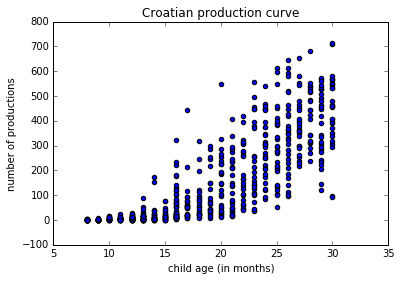

In [142]:
#let's have a look at production as a function of child age. 
#we'll start with the croatian data. 

#pick out just the croatian records
croatian_by_child = by_child_data[by_child_data['language'] == 'Croatian']

#let's get our independent variable
ages = croatian_by_child['age']
#and our dependent variable
produces = croatian_by_child['production']

#let's plot it
plt.scatter(ages, produces)
plt.xlabel('child age (in months)')
plt.ylabel('number of productions')
plt.title('Croatian production curve')

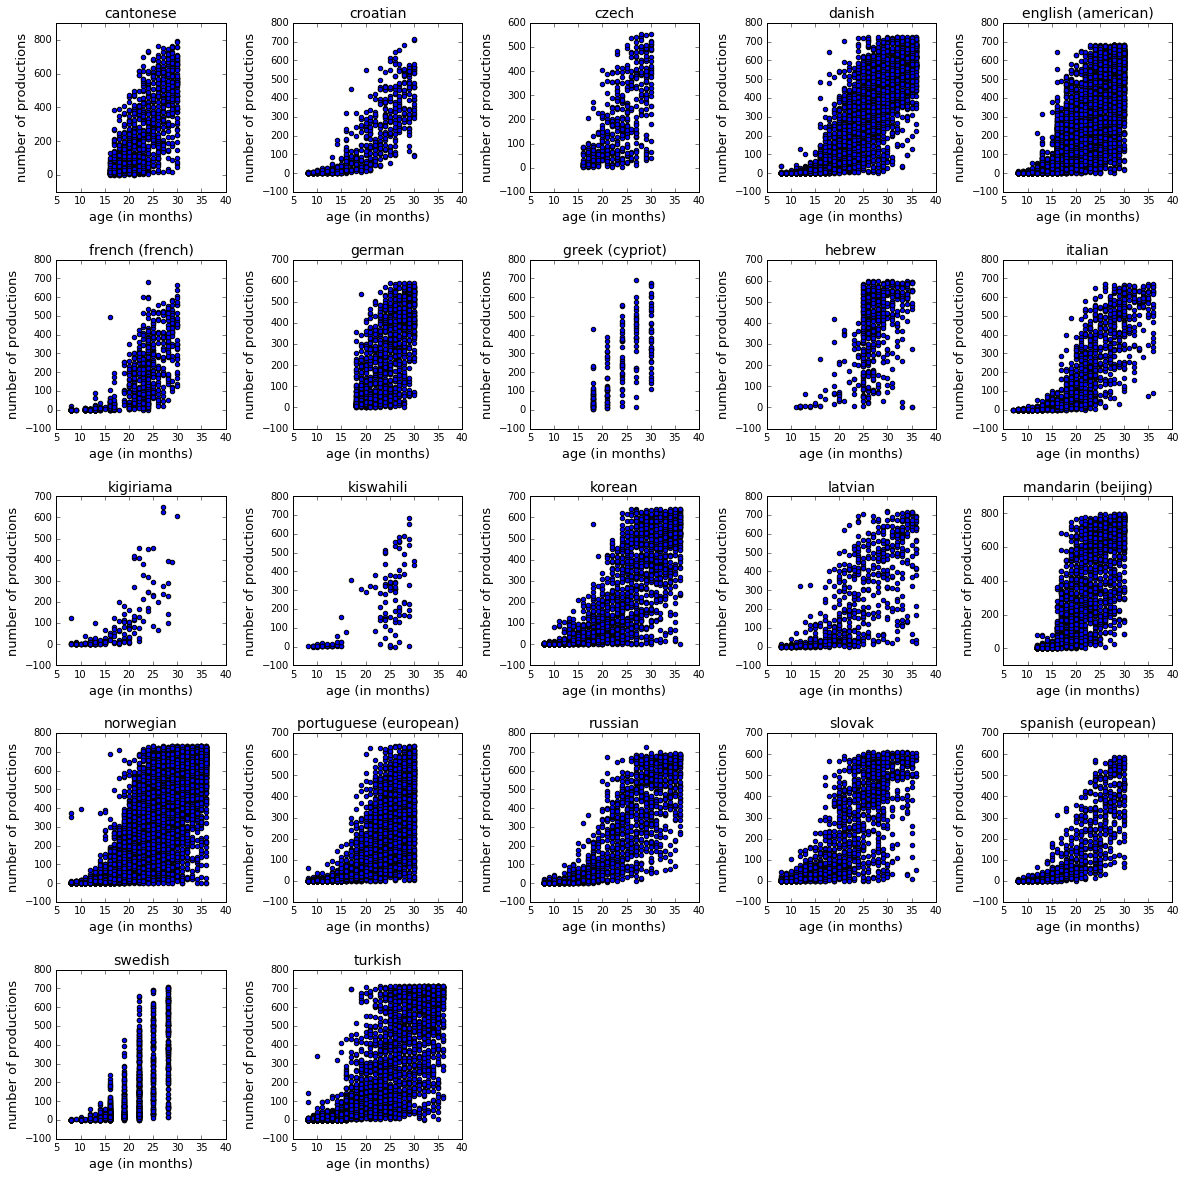

In [363]:
#actually let's have a look at this same plot for all 22 of our languages

plt.figure(figsize = (20, 20))

for l_ind, l in enumerate(languages):
    plt.subplot(5, 5, l_ind + 1)
    #get just the data for this language
    summary_data_by_child = by_child_data[by_child_data['language'].str.lower() == l]
    
    #get the independent and dependent variables
    ages = summary_data_by_child['age']
    produces = summary_data_by_child['production']
    
    #plot!
    plt.scatter(ages, produces)
    plt.xlabel('age (in months)', fontsize=13)
    plt.ylabel('number of productions', fontsize=13)
    plt.title(l, fontsize=14)
    plt.xlim(5, 40)    

plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.4)

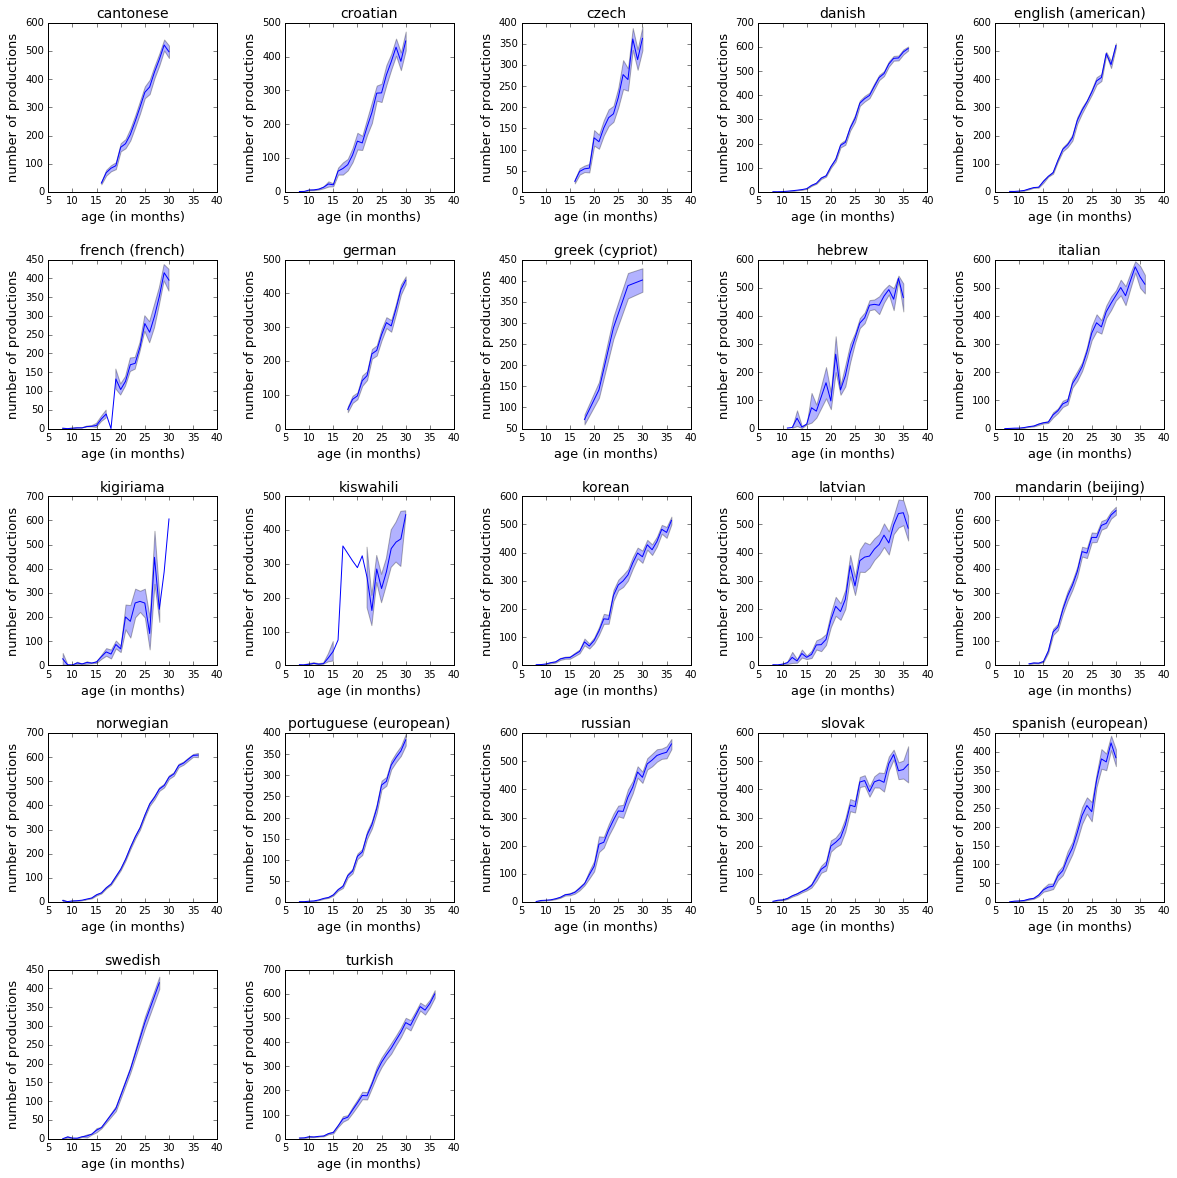

In [377]:
#let's clean this up a bit -- taking averages by per-month bin

plt.figure(figsize = (20, 20))

production_averages = {}
for l_ind, l in enumerate(languages):
    plt.subplot(5, 5, l_ind + 1)
    
    #get data just for this language
    summary_data_by_child = by_child_data[by_child_data['language'].str.lower() == l]
    
    #produce summaries of the mean, std, and sample length, grouped by age bin
    prod_means = summary_data_by_child[['age', 'production']].groupby(['age'], as_index=False).mean()
    prod_stds = summary_data_by_child[['age', 'production']].groupby(['age'], as_index=False).std()
    prod_lens = summary_data_by_child[['age', 'production']].groupby(['age'], as_index=False).agg(len)
    
    #get the independent variable
    ages = prod_means['age']
    
    #get the dependent variable mean
    means = prod_means['production']
    
    #get the dependent variable SEMs
    stds = prod_stds['production']
    lens = prod_lens['production']
    sems = stds / np.sqrt(lens)
    
    #store compute things for future use
    production_averages[l] = (ages, means, sems)
    
    #plot!
    plt.plot(ages, means)
    plt.fill_between(ages, means - sems, means + sems, alpha = .3)
    plt.xlabel('age (in months)', fontsize=13)
    plt.ylabel('number of productions', fontsize=13)
    plt.title(l, fontsize=14)
    plt.xlim(5, 40)

plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.4)

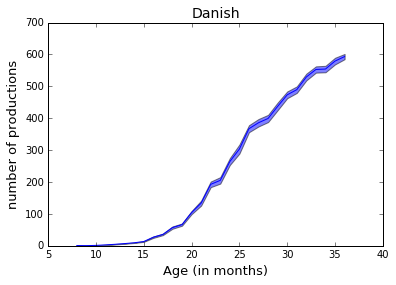

In [380]:
ages, means, sems = production_averages['danish']
plt.plot(ages, means)
plt.fill_between(ages, means-sems, means+sems, alpha=.5)
plt.xlabel('Age (in months)', fontsize=13)
plt.ylabel('number of productions', fontsize=13)
plt.title('Danish', fontsize=14)

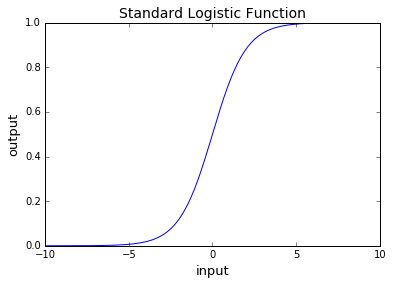

In [392]:
#reminds me of something ... 

def standard_logistic(x):
    return 1. / (1 + np.exp(-x))

x = np.arange(-10, 10, .1)
y = standard_logistic(x)
plt.plot(x, y)
plt.xlabel('input', fontsize=13)
plt.ylabel('output', fontsize=13)
plt.title('Standard Logistic Function', fontsize=14)

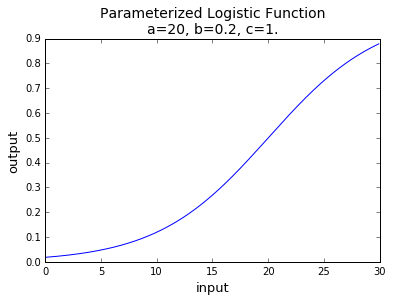

In [393]:
def parameterized_logistic(x, a=0, b=1., c=1.):
    return c / (1 + np.exp(- b * (x - a)))

x = np.arange(0, 30, .1)
y = parameterized_logistic(x, a=20, b=.2)
plt.plot(x, y)
plt.xlabel('input', fontsize=13)
plt.ylabel('output', fontsize=13)
plt.title('Parameterized Logistic Function\na=20, b=0.2, c=1.', fontsize=14)

### Production as a function of material education

In [149]:
#let's look at how production depends on maternal education
english_summary_data = by_child_data[by_child_data['language'].str.lower() == 'english (american)']

In [365]:
#lots of missing data
english_summary_data['mom_ed']

56637    Some Secondary
56638         Secondary
56639           College
56640         Secondary
56641         Secondary
56642         Secondary
56643      Some College
56644      Some College
56645    Some Secondary
56646         Secondary
56647      Some College
56648    Some Secondary
56649    Some Secondary
56650         Secondary
56651    Some Secondary
56652    Some Secondary
56653         Secondary
56654           Primary
56655      Some College
56656    Some Secondary
56657         Secondary
56658         Secondary
56659      Some College
56660    Some Secondary
56661      Some College
56662         Secondary
56663         Secondary
56664      Some College
56665         Secondary
56666         Secondary
              ...      
68617               NaN
68618               NaN
68619               NaN
68620               NaN
68621               NaN
68622               NaN
68623               NaN
68624               NaN
68625               NaN
68626               NaN
68627           

In [161]:
#a useful pandas function to detect missing data
english_summary_data['mom_ed'].isna()

56637    False
56638    False
56639    False
56640    False
56641    False
56642    False
56643    False
56644    False
56645    False
56646    False
56647    False
56648    False
56649    False
56650    False
56651    False
56652    False
56653    False
56654    False
56655    False
56656    False
56657    False
56658    False
56659    False
56660    False
56661    False
56662    False
56663    False
56664    False
56665    False
56666    False
         ...  
68617     True
68618     True
68619     True
68620     True
68621     True
68622     True
68623     True
68624     True
68625     True
68626     True
68627     True
68628     True
68629     True
68630     True
68631     True
68632     True
68633     True
68634     True
68635     True
68636     True
68637     True
68638     True
68639     True
68640     True
68641     True
68642     True
68643     True
68644     True
68645     True
68646     True
Name: mom_ed, Length: 7955, dtype: bool

In [197]:
#missing education data
no_ed_data = english_summary_data['mom_ed'].isna()

#not-missing education data
has_ed_data = np.invert(no_ed_data)

#subset just with education data
english_summary_with_ed = english_summary_data[has_ed_data]

In [164]:
#ok have a fair number of overal samples
len(english_summary_with_ed)

3844

In [165]:
#what are the educational-attainment values in the data? 
ed_types = np.unique(english_summary_with_ed['mom_ed'])
ed_types

array(['College', 'Graduate', 'Primary', 'Secondary', 'Some College',
       'Some Graduate', 'Some Secondary'], dtype=object)

In [166]:
#let's order them by amount of education
ed_by_order = ['Primary', 'Some Secondary', 'Secondary', 'Some College', 'College', 'Some Graduate', 'Graduate']

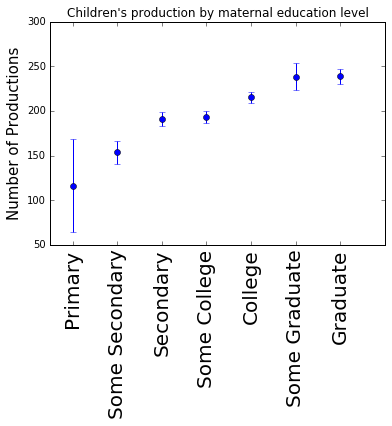

In [199]:
#now let's plot maternal ed level vs production

def prods_by_ed_level_mean(x, ed_level):
    prods = x[x['mom_ed'] == ed_level]['production']
    return prods.mean()


def prods_by_ed_level_sem(x, ed_level):
    prods = x[x['mom_ed'] == ed_level]['production']
    prods_std = prods.std()
    n = len(prods)
    return prods_std / np.sqrt(n)


production_means_by_mom_ed = [prods_by_ed_level_mean(english_summary_with_ed,
                                                     ed_level) for ed_level in ed_by_order]

production_sems_by_mom_ed = [prods_by_ed_level_sem(english_summary_with_ed,
                                                     ed_level) for ed_level in ed_by_order]

plt.errorbar(range(len(ed_by_order)), production_means_by_mom_ed, production_sems_by_mom_ed, fmt='o')
plt.xticks(np.arange(len(ed_by_order)), ed_by_order, rotation=90, fontsize=20)
plt.ylabel('Number of Productions', fontsize=15)
plt.xlim(-.5, len(ed_by_order))
plt.title("Children's production by maternal education level")

Ok it looks like there's a pattern above, but ... mightn't there be a big confounding factor? 

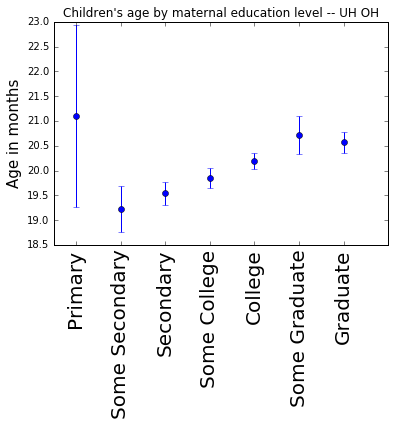

In [200]:
#let's look at the child age distribution  as a function of maternal education

def age_by_ed_level_mean(x, ed_level):
    prods = x[x['mom_ed'] == ed_level]['age']
    return prods.mean()


def age_by_ed_level_sem(x, ed_level):
    prods = x[x['mom_ed'] == ed_level]['age']
    prods_std = prods.std()
    n = len(prods)
    return prods_std / np.sqrt(n)


age_means_by_mom_ed = [age_by_ed_level_mean(english_summary_with_ed, ed_level) for ed_level in ed_by_order]
age_sems_by_mom_ed = [age_by_ed_level_sem(english_summary_with_ed, ed_level) for ed_level in ed_by_order]

plt.errorbar(range(len(ed_by_order)), age_means_by_mom_ed, age_sems_by_mom_ed, fmt='o')
plt.xticks(np.arange(len(ed_by_order)), ed_by_order, rotation=90, fontsize=20)
plt.ylabel('Age in months', fontsize=15)
plt.xlim(-.5, len(ed_by_order))
plt.title("Children's age by maternal education level -- UH OH")

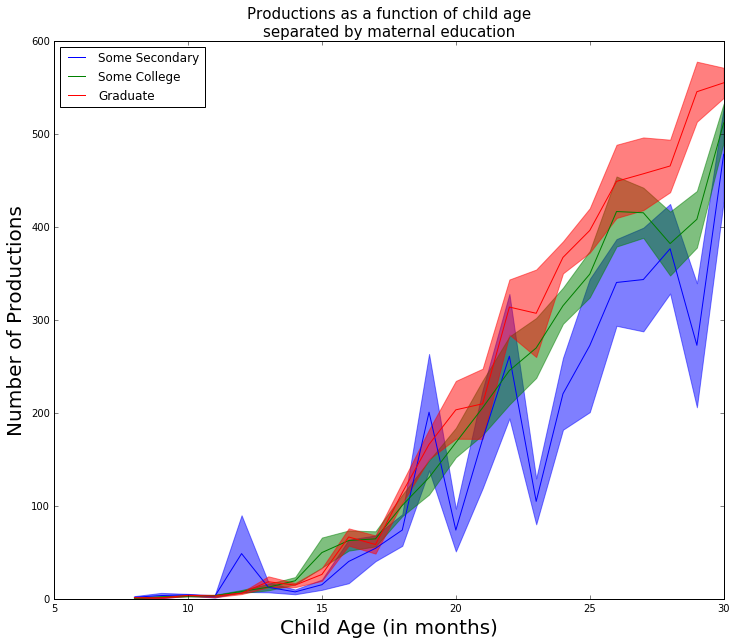

In [375]:
#So we really might need to built a regression model and control for the differences in child age in different
#maternal education-level groups

#but we can do something a little simpler and more direct just to visualize things, 
#by plotting production curve separately for different maternal education groups

plt.figure(figsize=(12, 10))

colors = ['blue', 'green', 'red', 'yellow', 'cyan', 'magenta', 'black']
ed_levels_subset = ['Some Secondary', 'Some College', 'Graduate']
for i, ed_level in enumerate(ed_levels_subset):
    level_inds = english_summary_with_ed['mom_ed'] == ed_level
    ed_level_subset = english_summary_with_ed[level_inds] 
    prod_group = ed_level_subset[['age', 'production']].groupby(['age'], as_index=False)    
    prod_means = prod_group.agg(np.mean)
    prod_stds = prod_group.agg(np.std)
    prod_lens = prod_group.agg(len)
    ages = prod_means['age']
    means = prod_means['production']
    sems = prod_stds['production'] / np.sqrt(prod_lens['production'])
    plt.plot(ages, means, color=colors[i])
    plt.fill_between(ages, means - sems, means + sems, alpha = 0.5, color=colors[i])
    
plt.xlabel('Child Age (in months)', fontsize=20)
plt.ylabel('Number of Productions', fontsize=20)
plt.legend(ed_levels_subset, loc='upper left')
plt.title('Productions as a function of child age\nseparated by maternal education', fontsize=15)